In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('탄산전체.json') as json_file:
    json_data = json.load(json_file)

In [3]:
df = pd.DataFrame(json_data['data'])

In [4]:
df

,level_0,index,Post,Hashtags,Locates,Date,Likes
0,0,0,[[#PEPSIxSTARSHIP]⁣\n⁣\n2020⁣ #PEPSI⁣ X⁣ #STAR...,"[PEPSIxSTARSHIP, PEPSI, STARSHIP, 강다니엘, SPECIA...",[],2020년 9월 18일,[]
1,1,1,[인증됨],"[YGAD, YG, BLACKPINK, 블랙핑크, PEPSI, 펩시, LISA]",[],2020년 9월 11일,"[83,872]"
2,2,2,[[#PEPSIxSTARSHIP]\n\n2020 #PEPSI X #STARSHIP\...,"[PEPSIxSTARSHIP, PEPSI, STARSHIP, 배진영, CONCEPT...",[],2020년 9월 20일,"[1,641]"
3,3,3,[인증됨],"[협찬, 펩시, PEPSI, 솔로플레이, 솔로플ᄅ...",[],2020년 10월 19일,"[21,678]"
4,4,4,[인증됨],"[YGAD, YG, BLACKPINK, 블랙핑크, PEPSI, 펩시, LISA]",[],2020년 9월 14일,[]
...,...,...,...,...,...,...,...
49056,7605,7605,[스프라이트 메이킹 영상^^ .\n.\nReposted from @kd_9287 -...,"[장기용, jangkiyong, 張基龍, チャンギヨン, 청하, chungha, 스프...",[],2019년 6월 19일,[]
49057,7606,7606,[Reposted from @cute_kiyong - #DiveInSprite ad...,"[DiveInSprite, 장기용, 장기용배우님, jangkiyong, 张基龙, 張...",[],2019년 6월 19일,[]
49058,7607,7607,[#서브웨이 일주일에 두번 이상 묵는듯 ❣️\n질리지않는 유일한 #점심식사\n#서브...,"[서브웨이, 점심식사, 서브웨이꿀조합, 허니오트, 바베큐, 마요네즈, 데리야끼샌드위...",[],2019년 6월 19일,[23]
49059,7608,7608,[스크류바 액상 입고되었습니다!\n한입 빨고 스크류펀치 쌉가능],"[청주, 전자담배, 복대동, 마스터전자담배, 전담, 액상, 문의, 담배, 동경피치,...",[],2019년 6월 19일,[83]


# Hashtags 분석

# 1. Word Cloud

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [6]:
tags = [element for array in list(df.Hashtags) for element in array]

In [7]:
tags[0:5]

['PEPSIxSTARSHIP', 'PEPSI', 'STARSHIP', '강다니엘', 'SPECIAL_CLIP']

In [8]:
sd_stop_words = ['error','펩시','코카콜라','pepsi','강다니엘','kangdaniel','마운틴듀','스프라이트','제로콜라', \
                'parkbogum', '박보검', '朴寶劍', '姜丹尼尔','パクボゴム','청춘기록','คโบกอม', 'ยล', 'ยล',\
                'งแดเน', 'カンダニエル', '콜라', '에이스침대', '서복', 'bogummy', 'danity', 'bluebird', \
                'bogum', 'bloomin', '보검복지부', '박보검팬미팅', '블루버드', '영화서복', '지코', '다니티', \
                'dearmyfriend','tvn드라마', 'starship', 'cocacola', 'tvn월화드라마', '커넥트엔터테인먼트', \
                'pepsixstarship', '사혜준', 'zico', 'cyan', 'cola', 'fortheloveofit','fortheloveof대한민국',\
                'mountaindew', '사이언', '2u', 'puma', 'канданиэль','allmylove','펩시콘서트',\
                'koz', 'kpop','좋은날', \
                '일상', 'daily', '데일리', \
                 '좋아요', '소통', '맞팔', '선팔', '푸마', 'coke', '팔로우']

In [9]:
cv = CountVectorizer(max_features=10000, stop_words = sd_stop_words)

In [10]:
tdm = cv.fit_transform(tags)

In [11]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [12]:
word_count.sort_values('빈도', ascending=False).query("빈도 < 380 & 빈도 > 360")

,단어,빈도
3928,다이캐스트미니카,378
4489,롯데시네마,377
4416,럽스타그램,376
4046,대통령,376
9304,펩시프로젝트아이돌,376
8598,카카오프렌즈,375
3309,광고,375
8021,존맛탱,375
7657,인스타그램,374
1068,korea,373


In [13]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [14]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

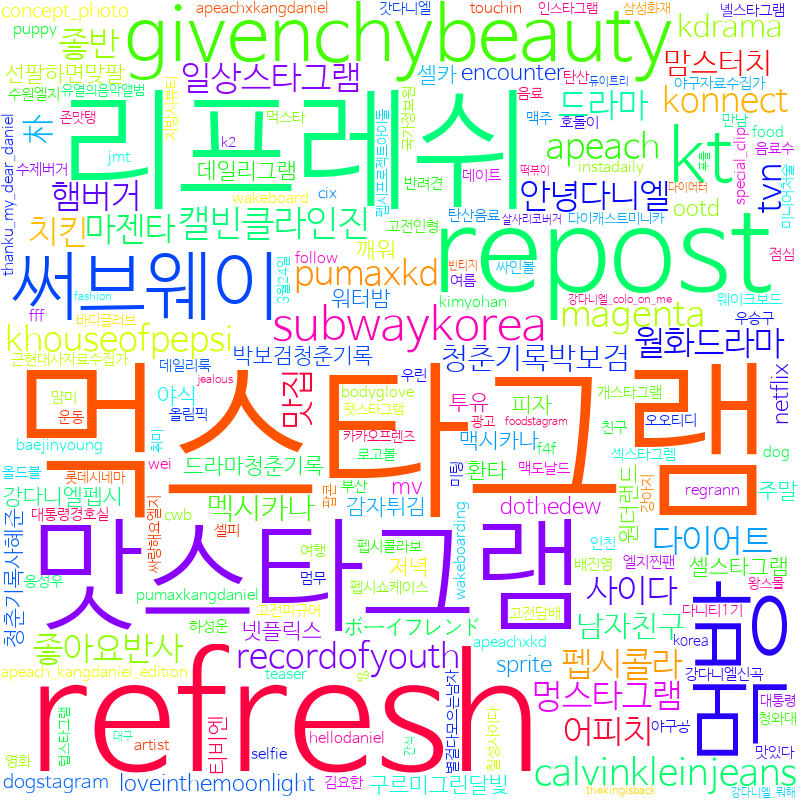

In [15]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [102]:
tdm.shape

(778217, 10000)

In [103]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [104]:
words = cv.get_feature_names()

In [105]:
tokens = tags

In [106]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 2min 7s


In [107]:
from sklearn.decomposition import TruncatedSVD

In [108]:
svd = TruncatedSVD(n_components=1000)

In [109]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [110]:
svd.components_.shape

(1000, 10000)

In [111]:
word_emb = svd.components_.T

In [112]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 7708
먹스타그램 4757
refresh 1498
리프레쉬 4475
맞팔 4649
소통 6044
daily 496
좋아요 8049
맛스타그램 4598
푸마 9425
데일리 4089
repost 1504
먹방 4739
givenchybeauty 778
써브웨이 6541
coke 430
kt 1106
subwaykorea 1699
calvinkleinjeans 331
캘빈클라인진 8648
선팔 5899
magenta 1185
팔로우 9180
펩시콜라 9304
다이어트 3859
드라마 4201
치킨 8510
코카콜라 2577
pumaxkd 1463
어피치 6886
안녕다니엘 6697
apeach 189
recordofyouth 1494
펩시 2624
khouseofpepsi 1040
햄버거 9726
맛집 4629
좋반 8043
좋아요반사 8054
일상스타그램 7720
朴宝剑 2799
tvn 1787
konnect 1059
사이다 5674
마젠타 4537
멍스타그램 4790
월화드라마 7404
청춘기록박보검 8374
맘스터치 4584
kdrama 1029
멕시카나 4807
남자친구 3651
loveinthemoonlight 1172
드라마청춘기록 4202
셀카 5986
구르미그린달빛 3369
sprite 1664
강다니엘펩시 3041
청춘기록사혜준 8376
encounter 635
맥시카나 4702
티비엔 9106
박보검청춘기록 5133
피자 9494
원더랜드 7372
ootd 1342
mv 1275
넷플릭스 3732
ボーイフレンド 2743
셀스타그램 5985
netflix 1292
감자튀김 2955
선팔하면맞팔 5908
깨워 3556
야식 6807
워터밤 7364
dothedew 599
주말 8075
저녁 7845
환타 9916
데일리그램 4091
투유 9072
concept_photo 459
dogstagram 590
apeach_kangdaniel_edition 190
apeachxkangdaniel 191
apeachxkd 192
puma

In [113]:
word_emb = svd.components_.T

In [114]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [115]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 48.8 s


84

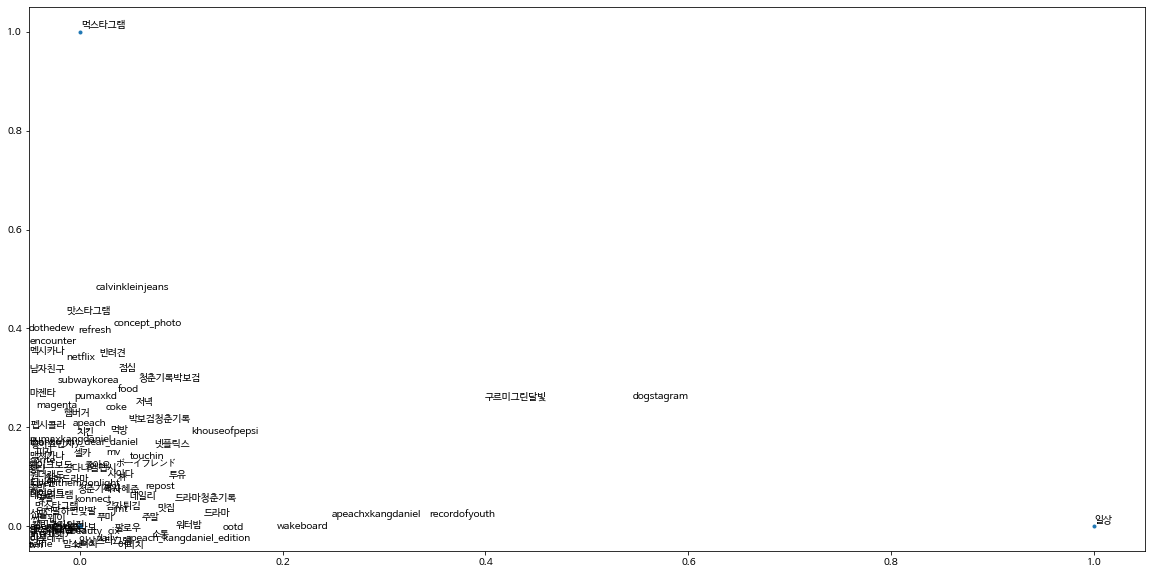

In [116]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')


texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [117]:
from sklearn.manifold import TSNE

In [118]:
tsne = TSNE()

In [119]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 7min 36s


500

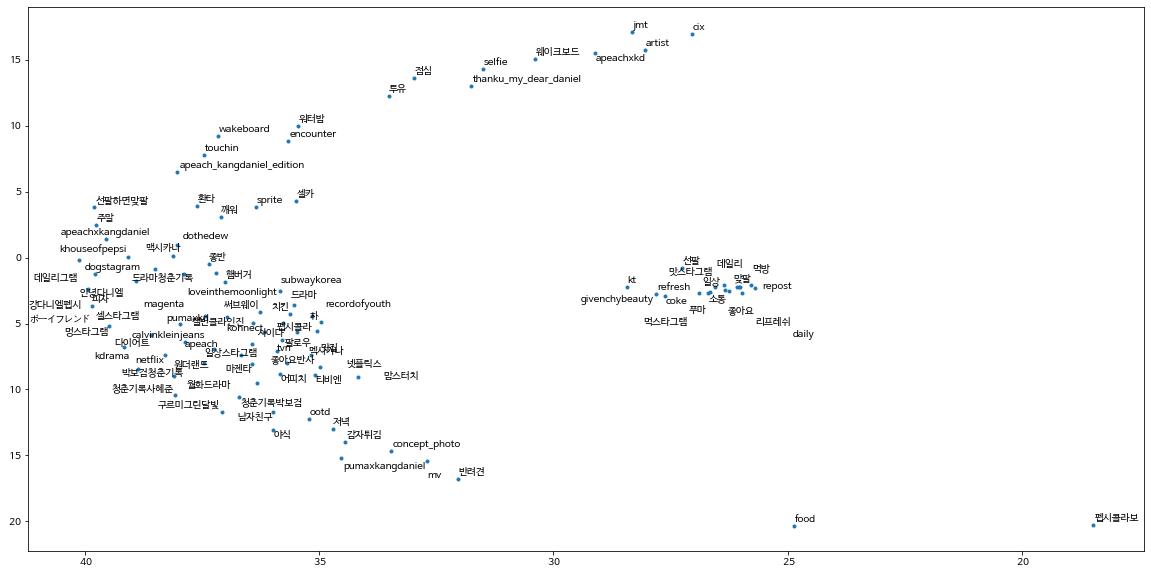

In [120]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [121]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [122]:
sentences = list(df['Hashtags'])

In [128]:
model = Word2Vec(sentences, size = 1000, min_count = 300, workers = 4, window = 100) # negative, sg

In [129]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [130]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [131]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 15)

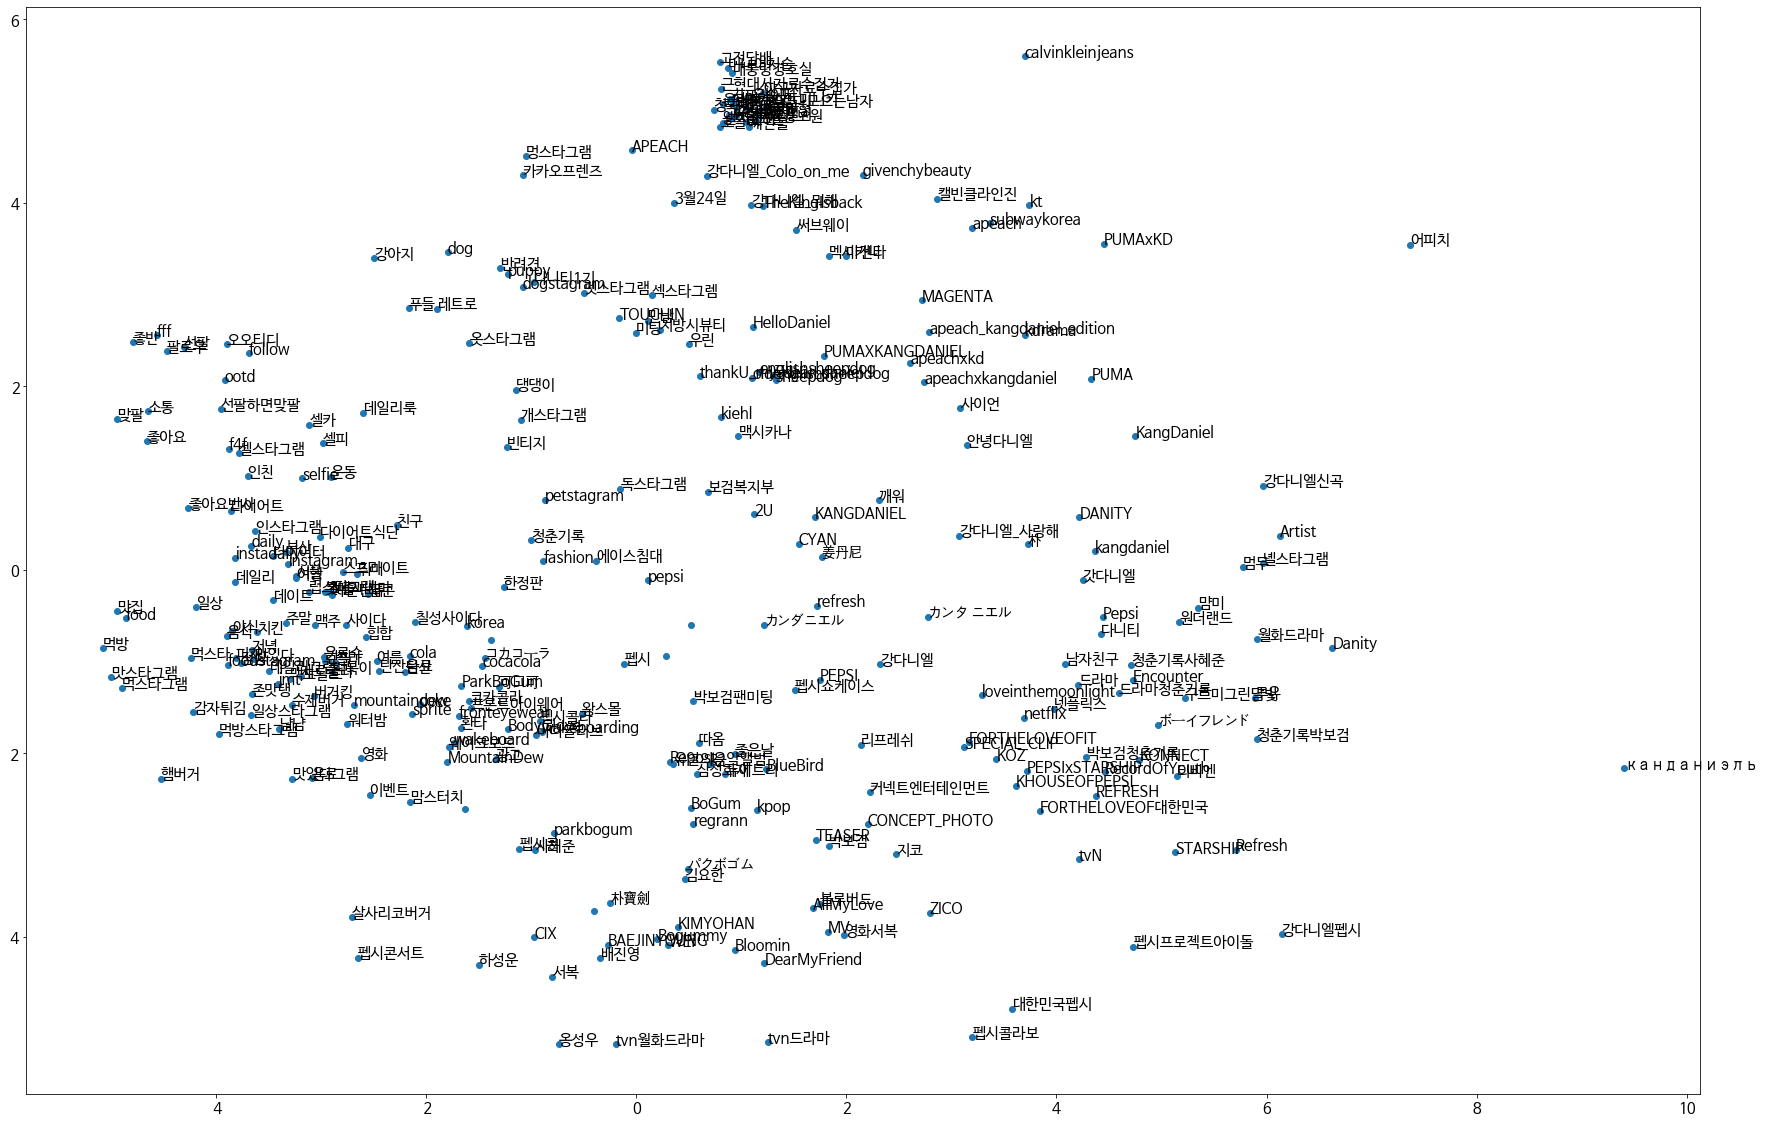

In [132]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [134]:
locates = [element for array in list(df.Locates) for element in array]

In [147]:
monster_lc_stop_words = ['error','','south','korea','seoul','busan','jeju','daegu','제주도','한라산','백록담',\
                        'cub', 'hallasan', '白鹿潭', '漢拏山','濟州島','incheon','ulsan','서울','gwangju',\
                        'daejeon', 'do','속초콜라','속초코라','부산','위례','어딘가']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [148]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
3632,우리집,151
3665,워터밤,144
1789,고척스카이돔,110
2350,로빈뮤지엄,107
1632,釜山,86
2111,다운타우너,75
454,downtowner,73
1499,wirye,72
2366,롯데시네마,72
1381,the,67


In [149]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [150]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

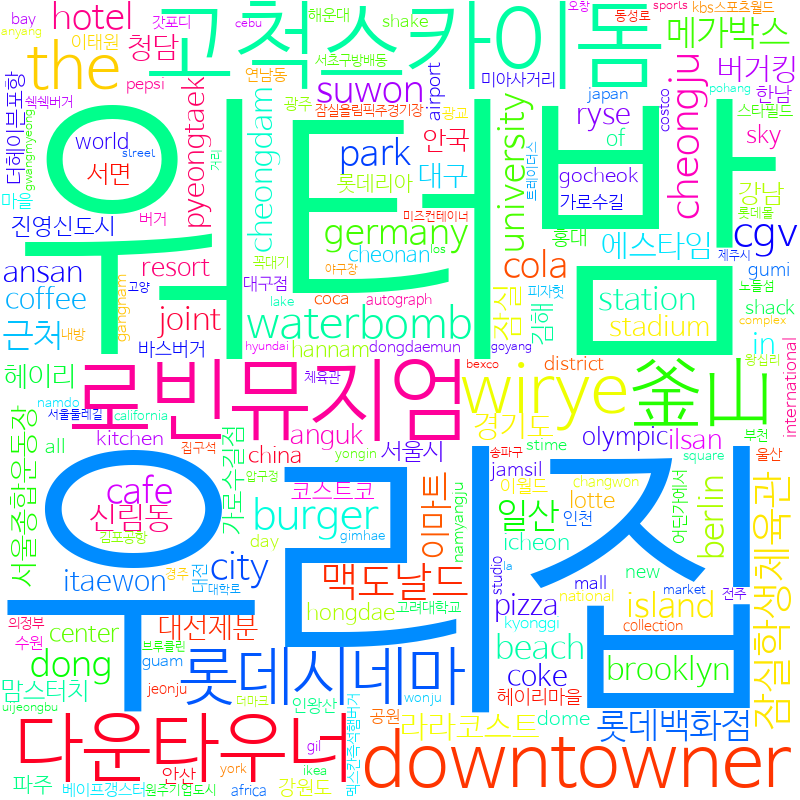

In [151]:
cloud.to_image()

## - Embedding

- LSA

In [48]:
tdm.shape

(12970, 6522)

In [49]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [50]:
words = cv.get_feature_names()
tokens = locates

In [51]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 2.17 s


In [52]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 9.89 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [53]:
svd.components_.shape

(1000, 6522)

In [54]:
word_emb = svd.components_.T

In [55]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 1569
busan 296
jeju 955
어딘가 4688
do 530
daegu 489
beach 205
제주도 5460
cub 473
한라산 6287
백록담 3550
hallasan 787
mt 1237
濟州島 2055
漢拏山 2053
白鹿潭 2058
station 1672
incheon 909
park 1372
대학로 2878
ulsan 1805
university 1819
우리집 5004
ski 1610
혜화 6392
daejeon 491
gwangju 762
surf 1698
서울 4005
club 422
stadium 1661
크로스핏 5908
alpensia 103
dong 535
알펜시아 4595
jumping 984
난지한강공원 2609
은평다목적체육관 5149
ultra 1806
라이브홀 3107
hall 785
예스24 4874
부천중앙공원 3730
live 1099
yes24 1939
lounge 1108
yeouido 1938
mall 1137
해변 6334
釜山 2067
resort 1479
박카스 3501
at 163
부산 3697
wework 1888
jukdo 982
molto 1215
몰토라운지 3379
죽도 5526
강남 2118
서프 4078
cheonan 372
octagon 1332
서피비치 4083
tower 1774
crossfit 469
coex 428
itaewon 933
위례신도시 5102
olympic 1340
경희대학교 2246
ifc 896
제로스테이션_zeropointtrail 5447
hotel 865
서울랜드 4021
공원 2313
꿈의숲 2572
international 924
jungmun 986
umf 1807
키득키득아트홀 5933
cheongju 376
fitness 634
suwon 1711
studio 1682
잠실 5333
ansan 126
경기도 2198
gu 739
서울캠퍼스 4057
근처 2494
홍대 6413
center 349
gangnam 670
올림픽공원 4945


In [56]:
word_emb = svd.components_.T

In [57]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 1min 26s


127

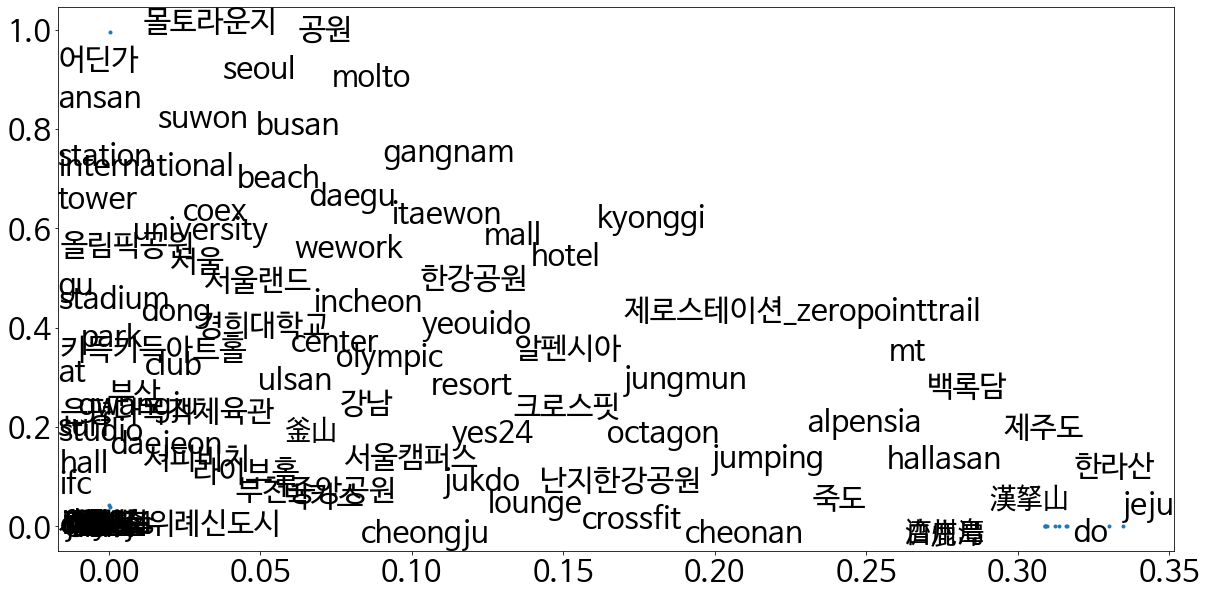

In [58]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [59]:
tsne = TSNE()

In [60]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 4min 16s


90

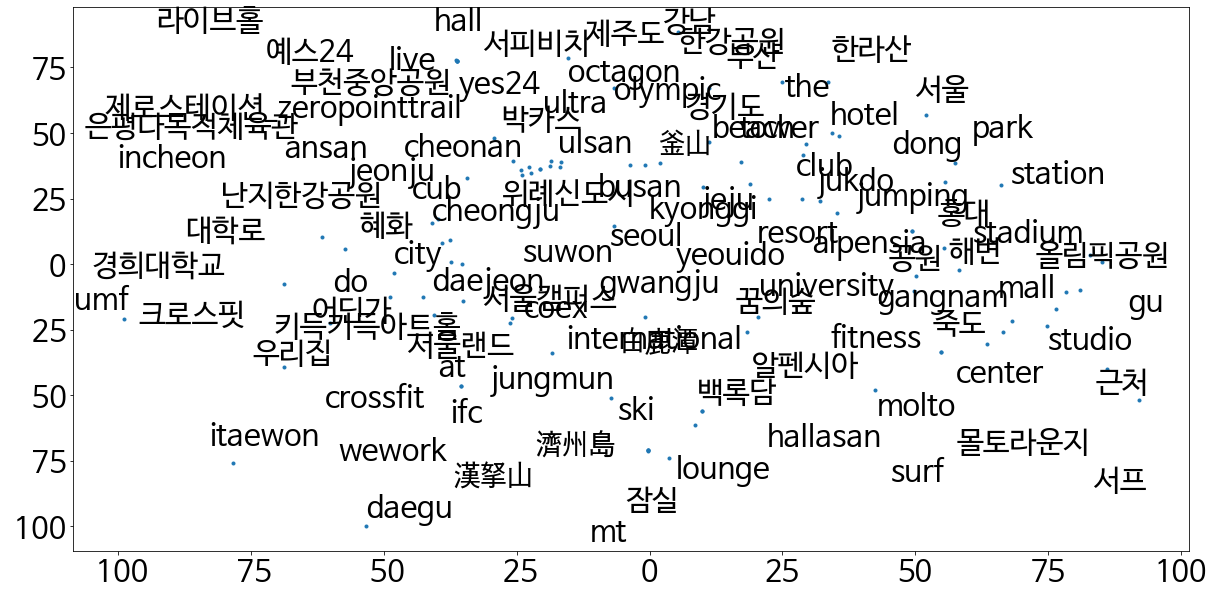

In [61]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [62]:
sentences = list(df['Locates'])

In [63]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [64]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 0 ns


In [65]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 6.95 ms


In [66]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

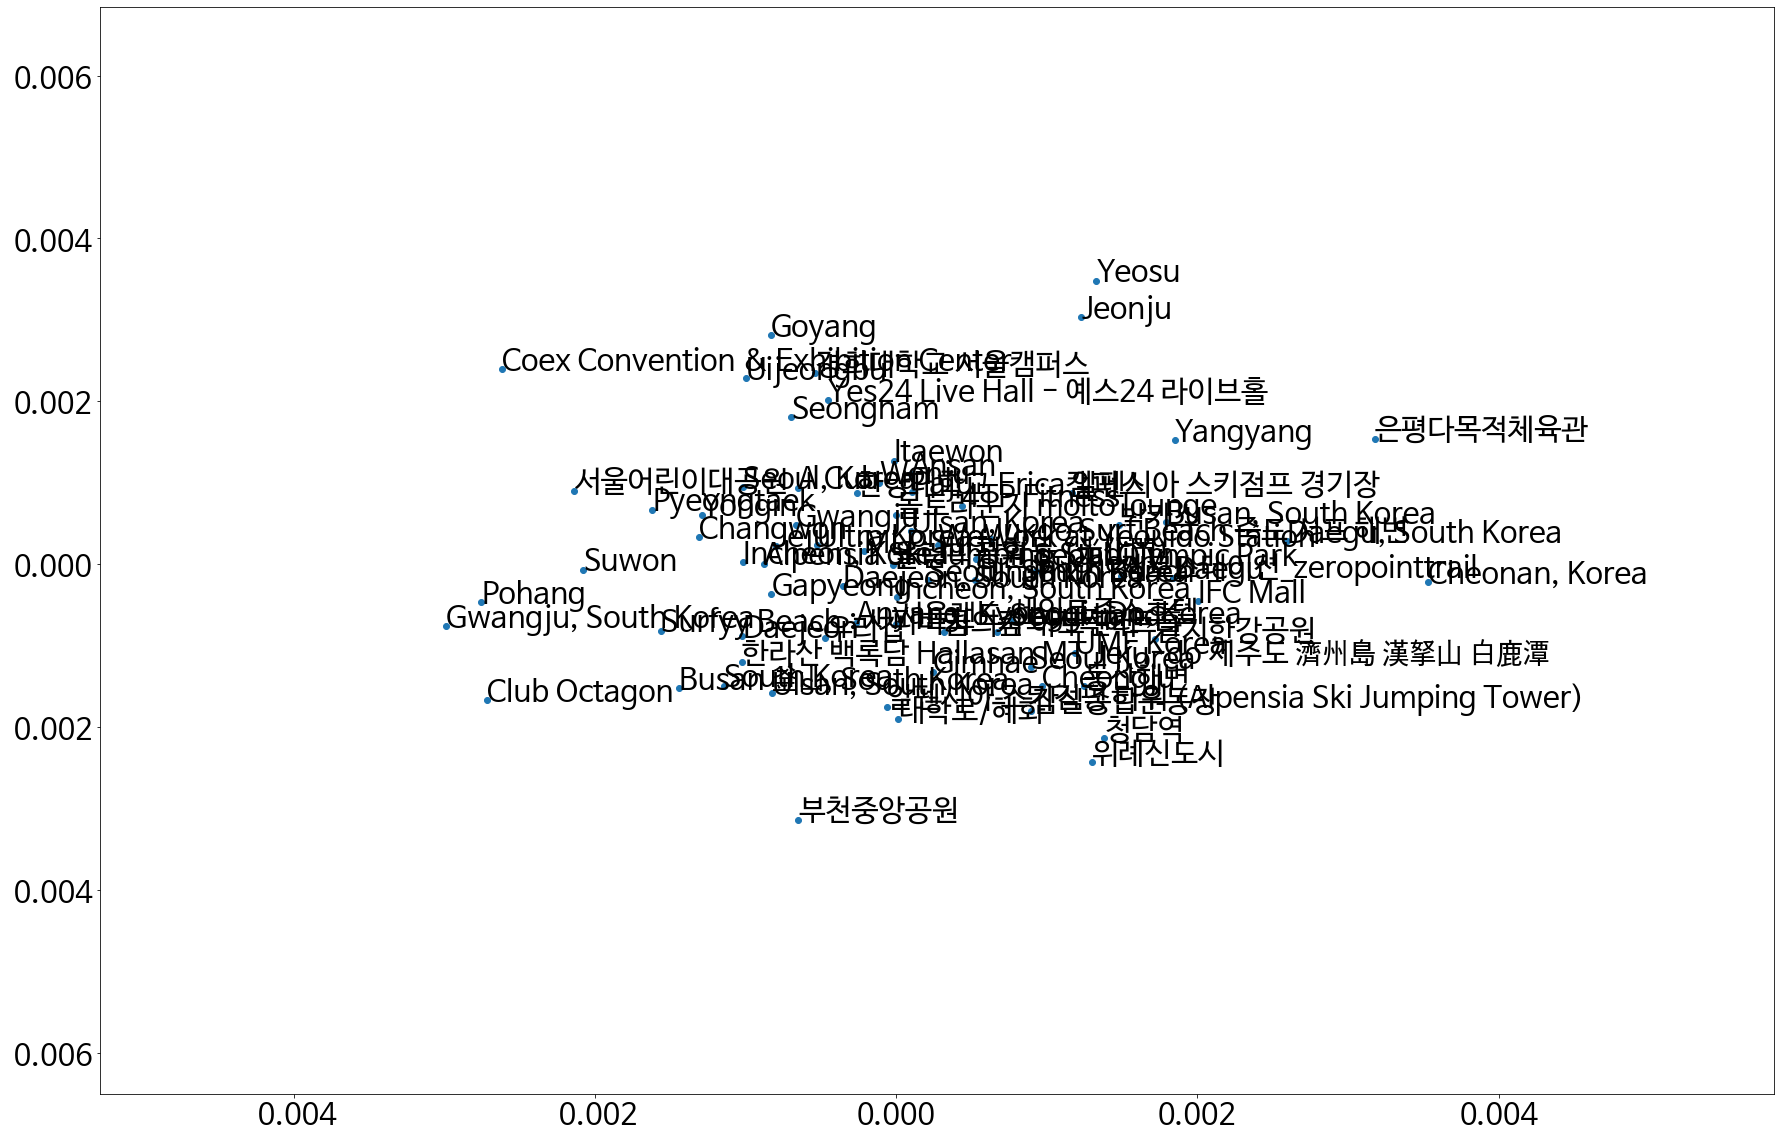

In [67]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))